In [1]:
import pandas as pd
import numpy as np
import os.path
path = "C:/Users/Xin~/Documents/CaliforniaHousing"
alldate = pd.read_csv(path+"/all_data.csv",header=0)


In [2]:
alldate.keys()

Index([u'Unnamed: 0', u'RegionName', u'sold_15', u'sold_16', u'list_15',
       u'list_16', u'one_15', u'one_16', u'two_15', u'two_16', u'thre_15',
       u'thre_16', u'four_15', u'four_16', u'five_15', u'five_16', u'cond_15',
       u'cond_16', u'trip_15', u'trip_16', u'sfr_15', u'sfr_16',
       u'Unemploy_Rate', u'Population', u'CrimeCases', u'Score2016',
       u'Score2015', u'Rank2016', u'Highest Rank City 2016', u'Zip2016',
       u'Rank2015', u'Highest Rank City 2015', u'Zip2015', u'Number Students',
       u'Number of Ranked Elementary Schools',
       u'Number of Ranked Middle Schools', u'Number of Ranked High Schools',
       u'total_income'],
      dtype='object')

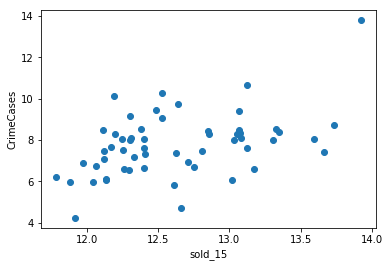

In [3]:
# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
# made log transformation. There seems to be a outlier
plt.plot(np.log(alldate["sold_15"]), np.log(alldate["CrimeCases"]),"o")
ax.set(xlabel="sold_15" , ylabel = "CrimeCases")
plt.show()

In [4]:
np.where(alldate.sold_15==alldate.sold_15.max())
#alldate.sold_15.max()

(array([11], dtype=int64),)

In [5]:
alldate.ix[11,"RegionName"]
# San Francisco is the outlier. 

'San Francisco'

In [6]:
alldate.ix[11,"sold_15"]
# its hosing price is extremely large

1107920.8333299998

In [7]:
med = np.nanmedian(alldate["sold_15"]) # calculating median while ignoring nans
mins = np.min(alldate["sold_15"])
maxs = np.max(alldate["sold_15"])
print med, mins, maxs

269717.708333 131600.0 1107920.83333


In [8]:
# Divide housing price into 3 groups : 0->low. 1->median. 2->high
highprice = np.where(alldate["sold_15"]>med)
lowprice = np.where(alldate["sold_15"]<=med)

In [46]:
len(highprice)

1

In [9]:
alldate["idprice"] = ["low"]*alldate.shape[0]
alldate["idprice"].ix[highprice[0]] = ["high"]*len(highprice[0])

C:\Users\Xin~\Anaconda3\envs\ipykernel_py2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
alldate["idprice"].ix[lowprice[0]] = ["low"]*len(lowprice[0])

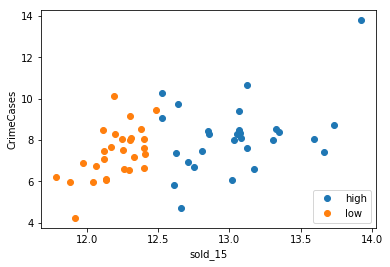

In [11]:
fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(np.log(group["sold_15"]), np.log(group["CrimeCases"]), "o",label=group.name)
    
alldate.groupby("idprice").apply(scatter)
ax.set(xlabel = "sold_15", ylabel = "CrimeCases")
ax.legend(loc = 4)

plt.show()

In [57]:
alldate

,Unnamed: 0,RegionName,sold_15,sold_16,list_15,list_16,one_15,one_16,two_15,two_16,...,Zip2016,Rank2015,Highest Rank City 2015,Zip2015,Number Students,Number of Ranked Elementary Schools,Number of Ranked Middle Schools,Number of Ranked High Schools,total_income,idprice
0,0,Los Angeles,4.987375e+05,5.185083e+05,5.376667e+05,5.873287e+05,363468.333333,409424.500000,4.331166e+05,4.695458e+05,...,90017,9.0,Acton,90017,1534702.0,1275.0,502.0,469.0,3263069,high
1,1,Orange,6.010208e+05,6.231500e+05,6.759321e+05,7.058900e+05,279250.000000,303945.833333,4.176875e+05,4.412208e+05,...,90620,31.0,Anaheim,90620,496719.0,385.0,113.0,100.0,1009353,high
2,2,San Diego,4.721875e+05,4.892500e+05,5.386500e+05,5.755250e+05,276475.000000,319328.625000,3.607782e+05,3.967041e+05,...,91901,10.0,Alpine,91901,502352.0,434.0,188.0,145.0,1094157,high
3,3,Riverside,3.090688e+05,3.204375e+05,3.442575e+05,3.617325e+05,145399.875000,145940.750000,2.279458e+05,2.379620e+05,...,92220,123.0,Banning,92220,425225.0,284.0,104.0,105.0,699232,high
4,4,San Bernardino,2.643271e+05,2.726667e+05,2.713125e+05,2.917333e+05,NaN,NaN,1.727791e+05,1.854682e+05,...,91701,115.0,Adelanto,91701,409680.0,336.0,125.0,100.0,614325,low
5,5,Santa Clara,7.992500e+05,8.563750e+05,8.225505e+05,8.882302e+05,441718.666667,467069.833333,5.505682e+05,6.242908e+05,...,94024,4.0,Campbell,94024,275810.0,248.0,93.0,75.0,621463,high
6,6,Alameda,6.147958e+05,6.618083e+05,6.279979e+05,6.877866e+05,350766.666667,398109.916667,4.469397e+05,5.095338e+05,...,94501,44.0,Alameda,94501,224453.0,219.0,87.0,83.0,558907,high
7,7,Sacramento,2.751083e+05,2.914417e+05,3.066311e+05,3.241530e+05,NaN,163918.250000,NaN,2.231291e+05,...,95608,209.0,Antelope,95608,237811.0,221.0,101.0,81.0,522596,high
8,8,Contra Costa,4.738750e+05,5.033750e+05,5.213989e+05,5.617979e+05,247643.750000,282395.375000,3.626432e+05,4.009770e+05,...,94509,2.0,Antioch,94509,174213.0,148.0,54.0,55.0,384646,high
9,9,Fresno,2.213333e+05,2.234167e+05,2.538533e+05,2.573312e+05,NaN,NaN,1.326749e+05,1.414245e+05,...,91398,35.0,Auberry,91398,199340.0,186.0,80.0,65.0,296305,low
